In [2]:
from common.module_functions import *
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph

data, X = get_data('common/data/earthquake_data.csv')
coords = data[['x', 'y', 'z']].values
adj_binary = kneighbors_graph(coords, n_neighbors = 7, mode='connectivity').toarray()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

cluster = AgglomerativeClustering(n_clusters = 5, connectivity= adj_binary)
data['cluster'] = cluster.fit_predict(scaled_features)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:323: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


In [3]:
visualize_3d(data)

/Users/agata/clustering_algorithms /main/algorithms/common/module_functions.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




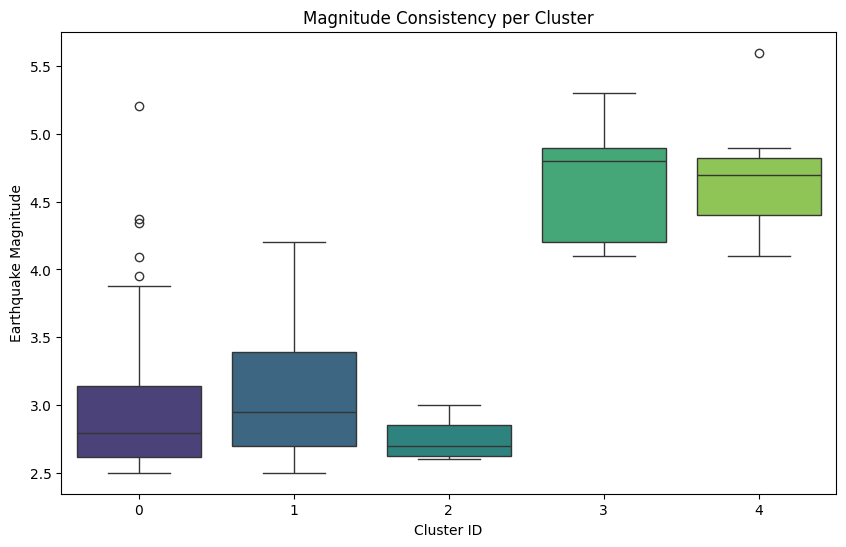

             mean       std  count  coefficient_of_variation
cluster                                                     
0        2.941379  0.443848    128                  0.150898
1        3.067924  0.442659     77                  0.144286
2        2.750000  0.164317      6                  0.059752
3        4.660000  0.502991      5                  0.107938
4        4.700000  0.447214      8                  0.095152


In [4]:
box_plot_by_cluster(data, 'cluster', 'mag')